# Comparative Analysis
In this notebook, we compare ClaSP with different competitors.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../../")

from tqdm import tqdm

In [3]:
from src.visualizer import plot_clasp, plot_clasp_with_ts
from src.utils import load_combined_dataset, load_floss_dataset, load_ucr_dataset

Let's choose a score for evaluation (F1 or Covering).

In [4]:
eval_score = "covering"

Let's choose a benchmark to evaluate.

In [5]:
benchmark = "combined"

In [6]:
df_bench = None

if benchmark == "UTSA":
    df_bench = load_floss_dataset()
elif benchmark == "TSSB":
    df_bench = load_ucr_dataset()
elif benchmark == "combined":
    df_bench = load_combined_dataset()
else:
    assert False

Let's load the scores from the different methods.

In [7]:
df_scores = pd.read_csv(f"../../experiments/unsupervised_segmentation_{eval_score}.csv")
df_scores = df_scores[df_scores.name.isin(df_bench["name"])]
df_scores

,name,ESPRESSO,BOCD,Window,PELT,BinSeg,FLOSS,ClaSP
0,Adiac,0.408,0.303,0.303,0.303,0.303,0.809,0.816
1,ArrowHead,0.701,0.483,0.500,0.500,0.500,0.995,0.996
2,Beef,0.487,0.344,0.500,0.500,0.500,0.935,0.848
3,BeetleFly,0.656,0.716,0.500,0.500,0.500,0.500,1.000
4,BirdChicken,0.459,0.366,0.500,0.500,0.500,0.500,0.500
5,CBF,0.505,0.613,0.342,0.342,0.342,0.861,0.680
6,Cane,0.401,0.561,0.553,0.326,0.413,0.741,0.988
7,Car,0.339,0.256,0.256,0.256,0.256,0.256,0.761
8,Chinatown,0.367,1.000,1.000,1.000,1.000,0.704,1.000
9,ChlorineConcentration,0.398,0.664,0.577,0.577,0.577,0.577,0.577


Let's calculate the mean/std score.

In [8]:
df_scores.mean(axis=0)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_2386/3665851733.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0)


ESPRESSO    0.484411
BOCD        0.480710
Window      0.441841
PELT        0.557879
BinSeg      0.560636
FLOSS       0.634056
ClaSP       0.837692
dtype: float64

In [9]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_2386/1084607075.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


ESPRESSO    0.167
BOCD        0.193
Window      0.213
PELT        0.265
BinSeg      0.272
FLOSS       0.252
ClaSP       0.194
dtype: float64

Let's compute the wins per method.

In [10]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [11]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

ESPRESSO:wins=7 rank=4.53271
BOCD:wins=8 rank=4.41121
Window:wins=8 rank=4.27103
PELT:wins=15 rank=3.42056
BinSeg:wins=16 rank=3.18692
FLOSS:wins=19 rank=2.91589
ClaSP:wins=70 rank=1.70093


Let's plot and output the ranks.

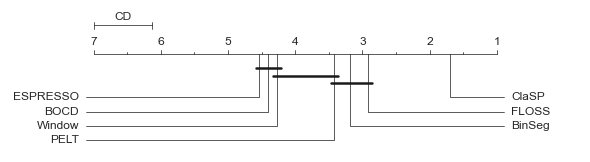

In [12]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, reverse=True, width=8, textspace=1.2)

Let's compute wins/losses against ClaSP.

In [13]:
selection = "ClaSP"

for rival in df_scores.columns[1:]:
    if rival == selection: continue
    
    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=False)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

ClaSP vs ESPRESSO: (wins/ties/losses): 94/0/13
ClaSP vs BOCD: (wins/ties/losses): 90/5/12
ClaSP vs Window: (wins/ties/losses): 85/16/6
ClaSP vs PELT: (wins/ties/losses): 80/15/12
ClaSP vs BinSeg: (wins/ties/losses): 79/15/13
ClaSP vs FLOSS: (wins/ties/losses): 72/16/19


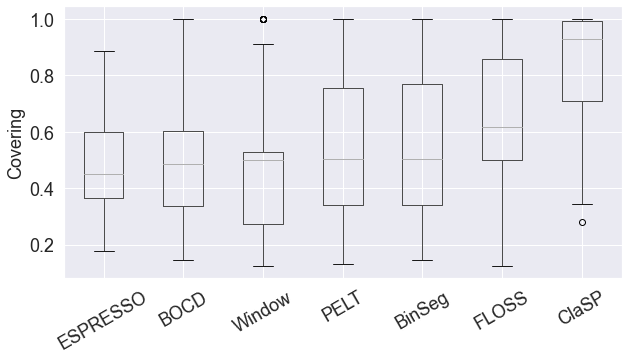

In [14]:
fontsize = 18
_, ax = plt.subplots(figsize=(10,5))

df_scores.boxplot(ax=ax, rot=30)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)